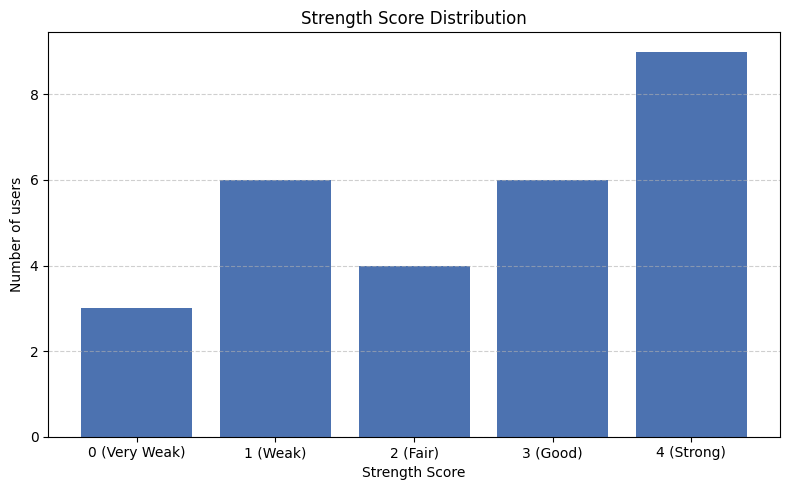

In [85]:
import pandas as pd
import matplotlib.pyplot as ppp
import seaborn as sns
from zxcvbn import zxcvbn

password_samples = [
    "akhdbd", "abc28849174", "Abcabc2008", "abb20030101!",
    "xxxxxxxx1111111", "ak¥yhsξhsg7#827636?736637?", "abc123",
    "qwerasdfzxcv123", "aaddeeQQ098", "aCyy2727000322", "Naive1984.456456",
    "xcfdsb1996", "123abc", "yzgdgs123", "yyy12345678", "123456alpha",
    "20000505x x", "abc1245A&", "whataniceday.0912", "Ab1c3d",
    "NAME+MMDD", "abdhshsh", "Dob+name+123…", "12345678",
    "helloworldDH126!!", "abc8209ksm", "1Sherkxoualw190@-", "Abc@123456.yyy"
]
results = []
for pw in password_samples:
    pwd = pw.strip()
    try:
        result = zxcvbn(pwd)
        results.append({"Password": pwd, "Score": result["score"]})
    except Exception as e:
        results.append({"Password": pwd, "Score": None, "Error": str(e)})
df = pd.DataFrame(results)
score_counts = df["Score"].value_counts().sort_index()
score_labels = ["0 (Very Weak)", "1 (Weak)", "2 (Fair)", "3 (Good)", "4 (Strong)"]
ppp.figure(figsize=(8, 5))
ppp.bar(score_counts.index, score_counts.values, color='#4C72B0')
ppp.xticks(ticks=range(5), labels=score_labels)
ppp.title("Strength Score Distribution")
ppp.xlabel("Strength Score")
ppp.ylabel("Number of users")
ppp.grid(axis='y', linestyle='--', alpha=0.6)
ppp.tight_layout()
ppp.show()

Most passwords fell into either the “Strong”，“Good” and “Weak” categories, with the highest number scoring 4. Which means that many students do indeed care about the strength of the passwords, which is a positive sign. 
However, there are also some passwords that seem quite complex, such as those that use both uppercase and lowercase letters along with symbols, giving the impression of being "quite secure". But the score given by zxcvbn is not high. For example, a password like "abc1245A&", which has this structure, only gets a score of 2. I think the reason is that although these passwords appear complex on the surface, their structure is too common, so they are still easily guessable.
This points to a problem: Users feel they are quite safe, but the system doesn't think so. This also precisely echoes what we learned in the second and fifth weeks: Sometimes users may believe they're making secure choices, while systems silently disagree, creating a false sense of confidence that can undermine real-world security.

,Password,Motivation,Score,Motivation_Short
0,akhdbd,Easy to type and remember,1,Easy
1,abc28849174,Based on website requirements (only complex if...,3,Have rule
2,Abcabc2008,Based on website requirements (only complex if...,3,Have rule
3,abb20030101!,Easy to type and remember,3,Easy
4,xxxxxxxx1111111,Based on website requirements (only complex if...,1,Have rule
5,ak¥yhsξhsg7#827636?736637!,Based on website requirements (only complex if...,4,Have rule
6,abc123,Easy to type and remember,0,Easy
7,qwerasdfzxcv123,Based on website requirements (only complex if...,1,Have rule
8,aaddeeQQ098,Security (even if complex and hard to remember),4,Security
9,aCyy2727000322,Based on website requirements (only complex if...,4,Have rule


,Motivation,Score
0,Based on website requirements (only complex if...,2.642857
1,Easy to type and remember,1.142857
2,Security (even if complex and hard to remember),3.285714


C:\Users\xucha\AppData\Local\Temp\ipykernel_8936\1381077006.py:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Motivation_Short", y="Score", estimator="mean", ci=None, color='#4C72B0')


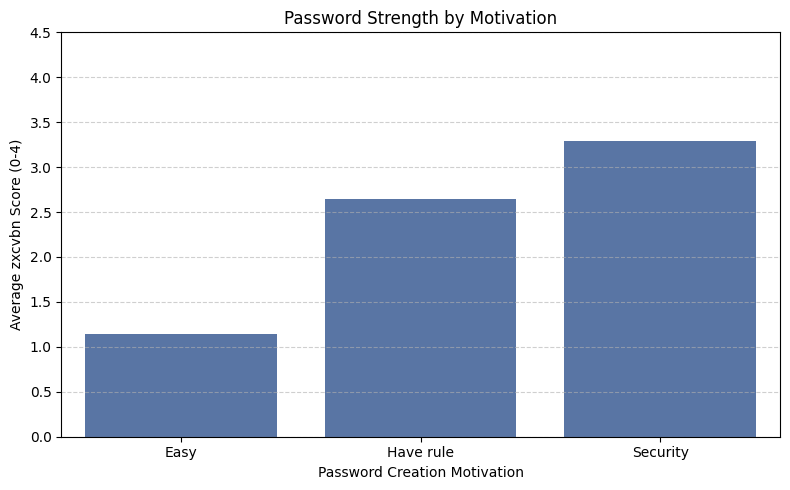

In [86]:
data = [
    ("akhdbd", "Easy to type and remember"),
    ("abc28849174", "Based on website requirements (only complex if required)"),
    ("Abcabc2008", "Based on website requirements (only complex if required)"),
    ("abb20030101!", "Easy to type and remember"),
    ("xxxxxxxx1111111", "Based on website requirements (only complex if required)"),
    ("ak¥yhsξhsg7#827636?736637!", "Based on website requirements (only complex if required)"),
    ("abc123", "Easy to type and remember"),
    ("qwerasdfzxcv123", "Based on website requirements (only complex if required)"),
    ("aaddeeQQ098", "Security (even if complex and hard to remember)"),
    ("aCyy2727000322", "Based on website requirements (only complex if required)"),
    ("Naive1984.456456", "Based on website requirements (only complex if required)"),
    ("xcfdsb1996", "Based on website requirements (only complex if required)"),
    ("123abc", "Easy to type and remember"),
    ("yzgdgs123", "Based on website requirements (only complex if required)"),
    ("yyy12345678", "Based on website requirements (only complex if required)"),
    ("123456alpha", "Based on website requirements (only complex if required)"),
    ("20000505x x", "Easy to type and remember"),
    ("abc1245A&", "Security (even if complex and hard to remember)"),
    ("whataniceday.0912", "Security (even if complex and hard to remember)"),
    ("Ab1c3d", "Security (even if complex and hard to remember)"),
    ("NAME+MMDD", "Based on website requirements (only complex if required)"),
    ("abdhshsh", "Easy to type and remember"),
    ("Dob+name+123…", "Based on website requirements (only complex if required)"),
    ("12345678", "Easy to type and remember"),
    ("helloworldDH126!!", "Security (even if complex and hard to remember)"),
    ("abc8209ksm", "Based on website requirements (only complex if required)"),
    ("1Sherkxoualw190@-", "Security (even if complex and hard to remember)"),
    ("Abc@123456.yyy", "Security (even if complex and hard to remember)")
]

records = []
for pw, motivation in data:
    score = zxcvbn(pw)['score']
    records.append({"Password": pw, "Motivation": motivation, "Score": score})
df = pd.DataFrame(records)
label_map = {
    "Easy to type and remember": "Easy",
    "Based on website requirements (only complex if required)": "Have rule",
    "Security (even if complex and hard to remember)": "Security"
}
df["Motivation_Short"] = df["Motivation"].map(label_map)
grouped = df.groupby("Motivation")["Score"].mean().reset_index()
display(df)
display(grouped)
ppp.figure(figsize=(8, 5))
sns.barplot(data=df, x="Motivation_Short", y="Score", estimator="mean", ci=None, color='#4C72B0')
ppp.title("Password Strength by Motivation")
ppp.ylabel("Average zxcvbn Score (0-4)")
ppp.xlabel("Password Creation Motivation")
ppp.ylim(0, 4.5)
ppp.grid(axis='y', linestyle='--', alpha=0.6)
ppp.tight_layout()
ppp.show()

From the chart, it can be seen that the passwords that were simply designed for "ease of remembering" are the weakest overall, with an average score of only around 1 point. In contrast, the passwords set out of "security concerns" have significantly higher scores, with an average score of more than 3 points. Although there are some fluctuations in the overall data, the trend is quite obvious, indicating that many people may not have truly understood the importance of password security. 
This result actually precisely confirms the content we covered in the second week: Without clear guidance or education, users tend to make less secure choices. Once people start looking for shortcuts, security takes a back seat. But then again, relying solely on mandatory complexity rules is not enough. Because if users do not truly understand the real purpose behind these rules, they might just go through the motions. As a result, the passwords they set may seem compliant on the surface, but are actually very weak. I remember in the fourth week's class, it was mentioned that no matter how many rules there are, if users merely follow them mechanically instead of truly understanding their meaning, they will eventually fall into the cycle of "apparently compliant but actually ineffective". 
So the core conclusion of this part of the analysis is: Password security cannot be achieved merely through "stacking rules"; rather, it should rely on the self-awareness of the password setters. Clear guidance should be provided to enable users to truly develop safer password habits. Focusing solely on complexity is actually of little use; at best, it merely gives some psychological comfort to those who set complex passwords.

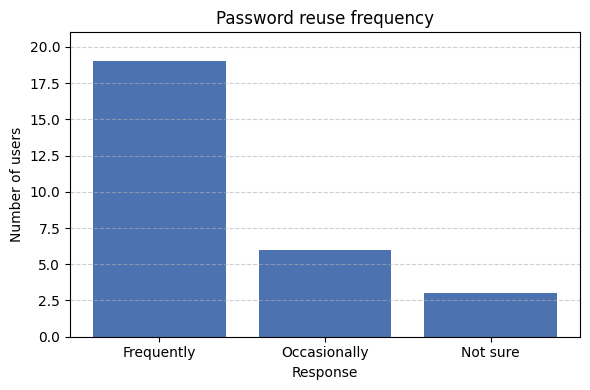

In [87]:
df = pd.read_excel("Student Cybersecurity Password Survey.xlsx")
reuse_counts = df[
    "2. Do you use the same or similar passwords across different websites?"
].dropna().astype(str).str.strip().value_counts().sort_values(ascending=False)
ppp.figure(figsize=(6, 4))
ppp.bar(reuse_counts.index, reuse_counts.values, color="#4C72B0")
ppp.title("Password reuse frequency")
ppp.xlabel("Response")
ppp.ylabel("Number of users")
ppp.ylim(0, max(reuse_counts.values) + 2)
ppp.grid(axis="y", linestyle="--", alpha=0.6)
ppp.tight_layout()
ppp.show()

This barchart shows something pretty worrying, that most students reuse passwords across multiple sites. Out of 28 responses, 19 people said they do this frequently, and since no one chose "never", I didn't include it in the chart.
So, password reuse is basically the norm. Although all of the surveyed students are highly educated, they still reused passwords. This highlights a critical issue: security risks are not always technical, they’re often rooted in human psychology and misunderstanding.
This also ties directly into what we covered in Week 3: when one site gets compromised, reused passwords make it easy for attackers to break into your other accounts. It’s like giving them a master key. It also shows how users tend to take the easy way out, and systems don’t really push back. That’s a human risk factor we can’t ignore.

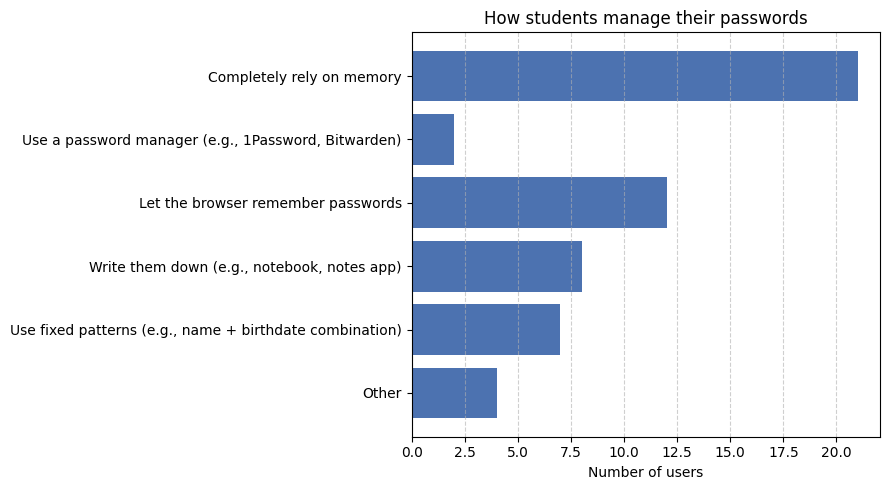

In [88]:
# df = pd.read_excel("Student Cybersecurity Password Survey.xlsx")
# q3 = df[
#     "3. How do you usually store/manage your passwords?"
# ].dropna()

# ssplit = q3.str.split(r",|\n|,").explode().str.strip()
# methcounts = ssplit.value_counts()

# ppp.figure(figsize=(8, 5))
# ppp.barh(methcounts.index[::-1], methcounts.values[::-1], color="#4C72B0")
# ppp.title("How students manage their passwords")
# ppp.xlabel("Number of users")
# ppp.grid(axis='x', linestyle='--', alpha=0.6)
# ppp.tight_layout()
# ppp.show()
df = pd.read_excel("Student Cybersecurity Password Survey.xlsx")
q3 = df["3. How do you usually store/manage your passwords?"].dropna()
standard_options = [
    "Completely rely on memory",
    "Use a password manager (e.g., 1Password, Bitwarden)",
    "Let the browser remember passwords",
    "Write them down (e.g., notebook, notes app)",
    "Use fixed patterns (e.g., name + birthdate combination)",
    "Other"
]
methcounts = {option: 0 for option in standard_options}
for response in q3:
    selections = [opt.strip() for opt in response.split("|")]
    for opt in selections:
        if opt in standard_options:
            methcounts[opt] += 1

ppp.figure(figsize=(9, 5))
ppp.barh(list(methcounts.keys())[::-1], list(methcounts.values())[::-1], color="#4C72B0")
ppp.title("How students manage their passwords")
ppp.xlabel("Number of users")
ppp.grid(axis='x', linestyle='--', alpha=0.6)
ppp.tight_layout()
ppp.show()

From the image, it can be seen that the majority of students still rely on rote memorization to manage their passwords, followed by writing them down for memo purposes, or using a fixed pattern like "name + birthday". But interestingly, tools such as password managers or browser auto-fill are hardly used by anyone. This indicates that although more secure tools exist, the majority of students still prefer to use those "seemingly convenient but actually very unsafe" traditional methods. In the second week, I learned about "Human Error and System Design Defects": Users often have the intention to do a good job in security protection, but if there is a lack of effective guidance and feedback, they are still likely to make unsafe choices in the end. At the same time, this also confirms the topic of "Trade-off between Usability and Security" in the fifth week, that is, even if users have a good security awareness, when the cost of safe operations is too high, they will eventually choose the convenient option because it is less troublesome.

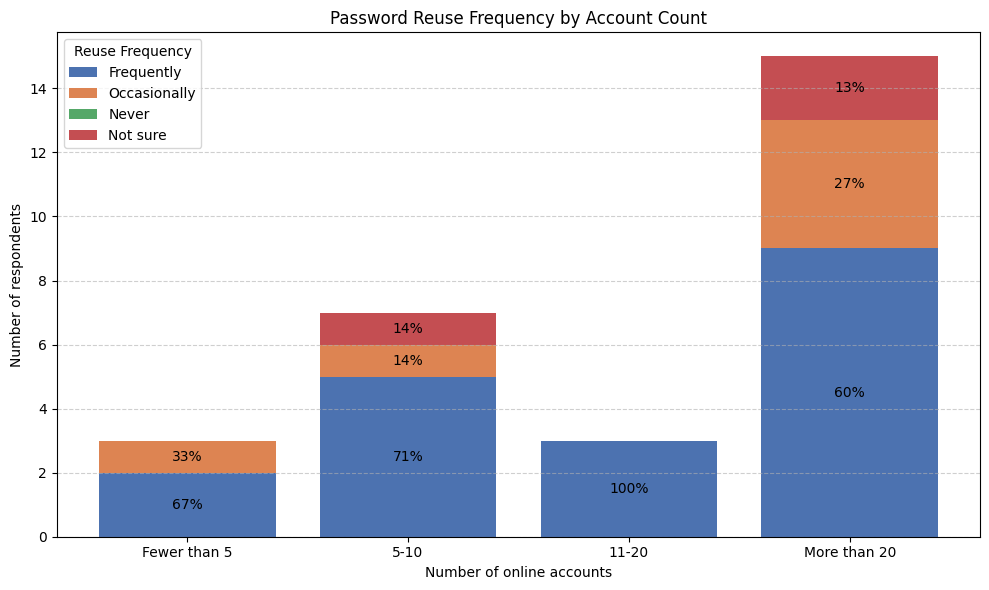

In [89]:
data = {
    "Account Count": ["Fewer than 5", "5-10", "11-20", "More than 20"],
    "Frequently": [2, 5, 3, 9],
    "Occasionally": [1, 1, 0, 4],
    "Never": [0, 0, 0, 0],
    "Not sure": [0, 1, 0, 2]
}
df = pd.DataFrame(data)
df.set_index("Account Count", inplace=True)
colors = ["#4C72B0", "#DD8452", "#55A868", "#C44E52"]
ppp.figure(figsize=(10, 6))
bottom = [0]*len(df)
for iii, col in enumerate(df.columns):
    values = df[col].values
    bars = ppp.bar(df.index, values, bottom=bottom, color=colors[iii], label=col)
    for i, (v, b) in enumerate(zip(values, bottom)):
        total = sum(df.iloc[i])
        if v > 0 and total > 0:
            percent = v/total
            ppp.text(i, b + v/2, f"{percent:.0%}", ha='center', va='center', fontsize=10)
    bottom = [b + v for b, v in zip(bottom, values)]
ppp.title("Password Reuse Frequency by Account Count")
ppp.xlabel("Number of online accounts")
ppp.ylabel("Number of respondents")
ppp.legend(title="Reuse Frequency")
ppp.grid(axis="y", linestyle="--", alpha=0.6)
ppp.xticks(rotation=0)
ppp.tight_layout()
ppp.show()

I also wanted to verify whether there is a relationship between the number of accounts and the reuse of passwords. Initially, I hypothesized that the more accounts there are, the higher the probability of password reuse should be. From the data, at first glance, people with more accounts do seem to be more likely to reuse passwords. However, if analyzed proportionally, this trend is not so obvious. For example, people with 11 to 20 accounts do not have a higher password reuse rate than those with fewer accounts. Even in the group with more than 20 accounts, the reuse situation does not show a significant increase. Of course, this could be because my sample size is relativelysmall, or it could be that everyone's password habits are indeed quite different. But this at least indicates one thing: Password reuse is not a mistake that occurs "only when there are more accounts". In many cases, it has no necessary relationship with the number.

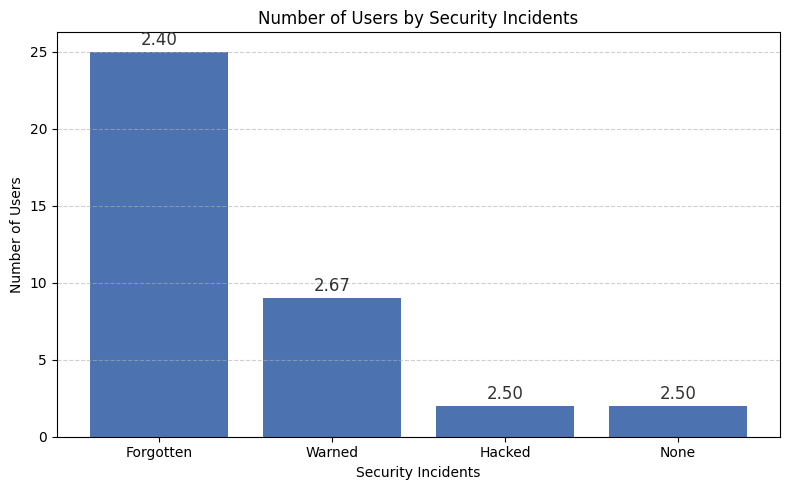

In [90]:
df = pd.read_excel("Student Cybersecurity Password Survey.xlsx")
option_map = {
    "Could not log in due to forgotten password": "Forgotten",
    "Received an email or text saying 'Your password may have been compromised'": "Warned",
    "Had your account hacked or noticed suspicious logins": "Hacked",
    "None of the above": "None"}
cdict = {v: 0 for v in option_map.values()}
strength_dict = {v: [] for v in option_map.values()}
for iii, row in df.iterrows():
    answer = str(row["5. Have you experienced any of the following situations?"])
    strength = row["Password Strength"]
    for key, label in option_map.items():
        if key in answer:
            cdict[label] += 1
            strength_dict[label].append(strength)
avgstrength = {k: (sum(v)/len(v) if v else 0) for k, v in strength_dict.items()}
labels = list(option_map.values())
counts = [cdict[l] for l in labels]
means = [avgstrength[l] for l in labels]

ppp.figure(figsize=(8, 5))
bars = ppp.bar(labels, counts, color="#4C72B0")
for iii, (count, mean) in enumerate(zip(counts, means)):
    ppp.text(iii, count + 0.2, f"{mean:.2f}", ha="center", va="bottom", fontsize=12, color="#333")
ppp.title("Number of Users by Security Incidents")
ppp.ylabel("Number of Users")
ppp.xlabel("Security Incidents")
ppp.xticks(rotation=0, ha="center")
ppp.grid(axis="y", linestyle="--", alpha=0.6)
ppp.tight_layout()
ppp.show()

From this chart, it can be seen that the most common security-related issue faced by students is - forgetting the password. Surprisingly, the average password strength of this type of users is actually lower than that of those who have been reminded by the system or even have been hacked. Isn't this a bit ironic? It turns out that weak passwords are also easy to forget. 
Looking at those users who had received warnings from browsers or services stating "Your password is not secure", their average score was slightly higher. This might be because they made changes after receiving the reminder. At the very least, it indicates that they were concerned about this issue.
The most interesting thing is that for those users who have actually been hacked, the average strength of their passwords is surprisingly quite high. This indicates a key point: a strong password does not necessarily mean absolute security. This also precisely confirms what we discussed in class: authentication is only a part of the security system, and the real security strategy also needs to take into account usability and human behavior. 
Finally, let's look at those users who filled in "Never encountered any problems". Their average score was the same as that of the group that was hacked. So were they really safer? Maybe...just good luck I guess.

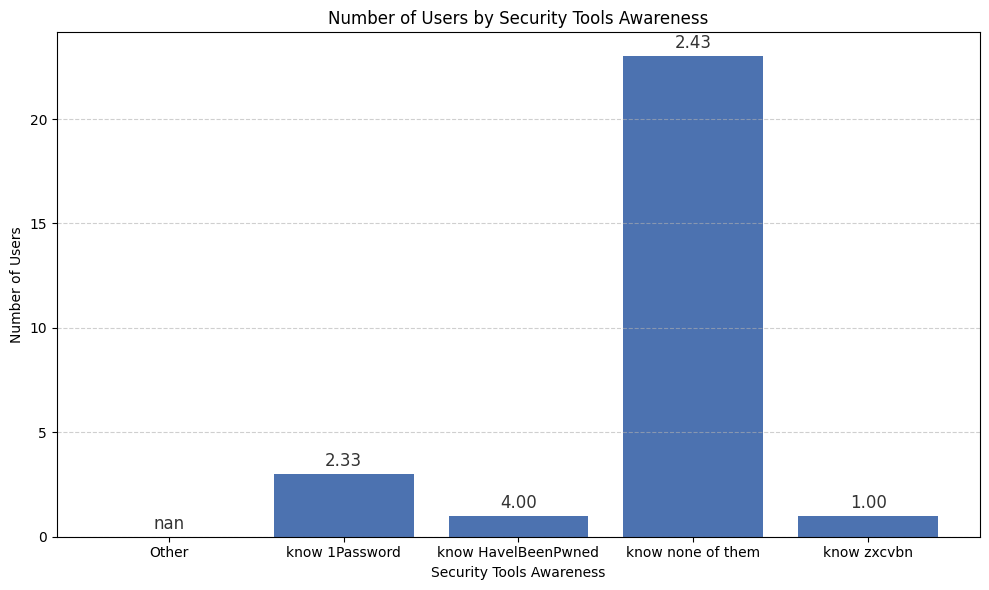

In [91]:
q6_map = {
    "zxcvbn (password strength analysis tool)": "know zxcvbn",
    "1Password (password manager)": "know 1Password",
    "HavelBeenPwned": "know HavelBeenPwned",
    "Never heard of any of them": "know none of them",
}
df["Q6"] = df["6. Which of the following security tools have you heard of?"].map(q6_map).fillna("Other")
q6 = df.groupby("Q6")["Password Strength"].agg(['count', 'mean']).reset_index()
ppp.figure(figsize=(10, 6))
bars = ppp.bar(q6["Q6"], q6["count"], color="#4C72B0")
for iii, row in q6.iterrows():
    ppp.text(iii, row["count"] + 0.2, f"{row['mean']:.2f}", ha="center", va="bottom", fontsize=12, color="#333")
ppp.title("Number of Users by Security Tools Awareness")
ppp.ylabel("Number of Users")
ppp.xlabel("Security Tools Awareness")
ppp.xticks(rotation=0, ha="center")
ppp.grid(axis="y", linestyle="--", alpha=0.6)
ppp.tight_layout()
ppp.show()

This one actually already speaks for itself. That is, most students have never heard of any security tools. It's no wonder that their password strength is generally not high, with an average score of approximately 2.43 out of 4 (the maximum score is 4). Although it's not particularly bad, it can't be called secure either. 
What's more interesting is that the person who had heard of "HaveIBeenPwned" scored an average of 4 out of 4, topping the list. It seems that realizing the severity of data breaches does prompt people to take password security seriously. 
As for those who knew about 1Password, their performance was average, with scores that were decent but not particularly outstanding. However, the group of students who only knew zxcvbn scored lower. I think this might be influenced by the small sample size. This set of data is not very meaningful and should just be regarded as a phenomenon.